In [1]:
import sys
import copy
import rospy
import moveit_commander
import moveit_msgs.msg
import geometry_msgs.msg
import ros_numpy
from std_msgs.msg import String
from moveit_commander.conversions import pose_to_list
from sensor_msgs.msg import Image , LaserScan , PointCloud2
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
rospy.init_node("move_group_python_interface_tutorial", anonymous=True)

In [3]:
def plot_with_cbar(image,cmap="jet"):
    ax = plt.subplot()
    im=ax.imshow(image, cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

def removeBackground(points_msg,distance = 2):
    # Obtengo rgb
    points_data = ros_numpy.numpify(points_msg)
    image_data = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]   
    image=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
    image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    

    # Quito todos los pixeles que esten a una distancia mayor y/o a una distancia menor
    # Para poder obtener una mascara con ceros y unos
    zs_no_nans=np.where(~np.isnan(points_data['z']),points_data['z'],10)
    img_corrected = np.where((zs_no_nans < distance + 0.3),zs_no_nans,0)
    #img_corrected = np.where((img_corrected >1.5),img_corrected,0)
    img_corrected = np.where((img_corrected == 0),img_corrected,1)

    # operacion AND entre la imagen original y la mascara para quitar fondo (background)
    #img_corrected = img_corrected.astype(np.uint8)
    masked_image = cv2.bitwise_and(rgb_image, rgb_image, mask=img_corrected.astype(np.uint8))
    return rgb_image, masked_image    

In [4]:
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)
points_data = ros_numpy.numpify(points_msg) 


In [5]:
distToTF = 2
image, masked_image = removeBackground(points_msg,distance = distToTF + 0.25)
    

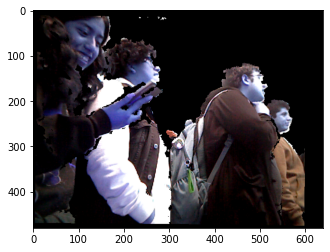

In [6]:
plt.imshow(masked_image)

In [10]:
points_data = ros_numpy.numpify(points_msg)
image_data = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]   
image=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    


In [5]:
points_data = ros_numpy.numpify(points_msg)

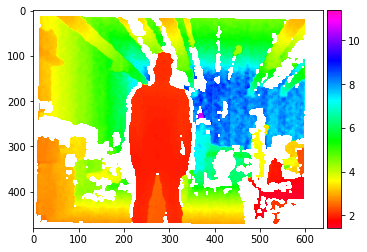

In [6]:
plot_with_cbar(points_data['z'],cmap="gist_rainbow")

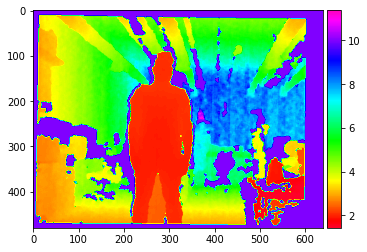

In [7]:
zs_no_nans=np.where(~np.isnan(points_data['z']),points_data['z'],10)
plot_with_cbar(zs_no_nans,cmap="gist_rainbow")

In [13]:
distance = 2
img_corrected = np.where((zs_no_nans < distance + 0.3),zs_no_nans,0)
#img_corrected = np.where((img_corrected >1.5),img_corrected,0)
img_corrected = np.where((img_corrected == 0),img_corrected,1)
masked_image = cv2.bitwise_and(rgb_image, rgb_image, mask=img_corrected.astype(np.uint8))


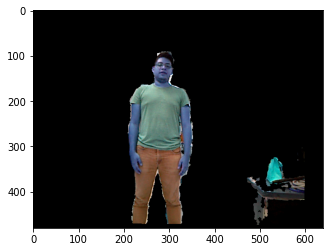

In [14]:
plt.imshow(masked_image)

In [4]:
import rospkg


In [5]:
rospack = rospkg.RosPack()        
file_path = rospack.get_path('config_files') 

In [6]:
file_path

'/home/takeshi/catkin_extras/src/navigation_pumas/config_files'